___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

In this project, you must apply EDA processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges.

Also, this project aims to improve your ability to implement algorithms for Multi-Class Classification. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

# Determines

The 2012 US Army Anthropometric Survey (ANSUR II) was executed by the Natick Soldier Research, Development and Engineering Center (NSRDEC) from October 2010 to April 2012 and is comprised of personnel representing the total US Army force to include the US Army Active Duty, Reserves, and National Guard. In addition to the anthropometric and demographic data described below, the ANSUR II database also consists of 3D whole body, foot, and head scans of Soldier participants. These 3D data are not publicly available out of respect for the privacy of ANSUR II participants. The data from this survey are used for a wide range of equipment design, sizing, and tariffing applications within the military and has many potential commercial, industrial, and academic applications.

The ANSUR II working databases contain 93 anthropometric measurements which were directly measured, and 15 demographic/administrative variables explained below. The ANSUR II Male working database contains a total sample of 4,082 subjects. The ANSUR II Female working database contains a total sample of 1,986 subjects.


DATA DICT:
https://data.world/datamil/ansur-ii-data-dictionary/workspace/file?filename=ANSUR+II+Databases+Overview.pdf

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (body scales, and race characteristics) knowledge on the internet to get to know the data set in the fastest way.

You will implement ***Logistic Regression, Support Vector Machine, XGBoost, Random Forest*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, choose the most successful model and try to enhance the scores with ***SMOTE*** make it ready to deploy. Furthermore, use ***SHAP*** to explain how the best model you choose works.

# Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Ingest Data *
    
    *iii. Explore Data*
    
    *iv. Outlier Detection*
    
    *v.  Drop unnecessary features*

#### 2. Data Preprocessing
- Scale (if needed)
- Separete the data frame for evaluation purposes

#### 3. Multi-class Classification
- Import libraries
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



# EDA
- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

## Import Libraries
Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [165]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate


from sklearn.metrics import (
    accuracy_score,
    f1_score,
    recall_score,
    precision_score,
    make_scorer,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    average_precision_score,
    roc_curve,
    auc,
)
from sklearn.model_selection import GridSearchCV


%matplotlib inline

pd.set_option("display.max_rows", 1000)
pd.set_option("display.max_columns", 1000)
pd.set_option("display.width", 1000)
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [166]:
!pip3 install xgboost






[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: pip install --upgrade pip


In [167]:
from xgboost import XGBClassifier

## Ingest Data from links below and make a dataframe
- Soldiers Male : https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr
- Soldiers Female : https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq

In [168]:
df_f = pd.read_csv('ANSUR II FEMALE Public.csv')
#reading data female ansure II dataframe 

In [169]:
df_m = pd.read_csv('ANSUR II MALE Public.csv', encoding='latin-1')
#reading the data frame and using encoding ="latin-1" to read certain symbols

## Explore Data

In [170]:
print(df_f.shape)
print(df_m.shape)

#checking the size of both dfs we have (1986, 108) in female 108 features
#male (4082, 108) 108 features 


(1986, 108)
(4082, 108)


In [171]:
df_f.head()

,SubjectId,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10037,231,1282,301,204,1180,222,177,373,315,263,466,65,338,301,141,1011,223,836,587,476,360,1336,274,922,245,1095,759,557,310,35,65,16,220,713,91,246,316,265,517,432,1028,75,182,184,141,548,191,314,69,345,388,966,645,363,399,435,496,447,55,404,118,335,368,1268,113,362,235,1062,327,148,803,809,513,1647,1560,1280,1013,622,174,736,430,110,844,1488,406,295,850,217,345,942,657,152,756,Female,5-Oct-10,Fort Hood,Regular Army,Combat Support,92Y,Germany,2,NaN,2,26,61,142,Right hand
1,10038,194,1379,320,207,1292,225,178,372,272,250,430,64,294,270,126,893,186,900,583,483,350,1440,261,839,206,1234,835,549,329,32,60,23,208,726,91,249,341,247,468,463,1117,78,187,189,138,535,180,307,60,315,335,1048,595,340,375,483,532,492,69,334,115,302,345,1389,110,426,259,1014,346,142,835,810,575,1751,1665,1372,1107,524,152,771,475,125,901,1470,422,254,708,168,329,1032,534,155,815,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,California,3,Mexican,3,21,64,120,Right hand
2,10042,183,1369,329,233,1271,237,196,397,300,276,450,69,309,270,128,987,204,861,583,466,384,1451,287,874,223,1226,821,643,374,36,65,26,204,790,100,265,343,262,488,469,1060,84,198,195,146,588,207,331,70,356,399,1043,655,345,399,470,530,469,64,401,135,325,369,1414,122,398,258,1049,362,164,904,855,568,1779,1711,1383,1089,577,164,814,458,129,882,1542,419,269,727,159,367,1035,663,162,799,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,35D,Texas,1,NaN,1,23,68,147,Right hand
3,10043,261,1356,306,214,1250,240,188,384,364,276,484,68,340,294,144,1012,253,897,599,471,372,1430,269,1008,285,1170,804,640,351,38,62,22,244,775,97,265,331,309,529,455,1069,80,192,186,153,593,206,332,68,337,402,1029,655,392,435,469,520,478,67,402,118,357,386,1329,115,394,250,1121,333,157,875,815,536,1708,1660,1358,1065,679,187,736,463,125,866,1627,451,302,923,235,371,999,782,173,818,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,District of Columbia,8,Caribbean Islander,2,22,66,175,Right hand
4,10051,309,1303,308,214,1210,217,182,378,320,336,525,67,300,295,135,1281,284,811,607,467,433,1362,305,1089,290,1112,726,686,356,34,65,18,233,732,88,247,339,260,596,447,1039,78,183,187,140,522,181,308,63

In [172]:
df_m.head()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10027,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,Male,4-Oct-10,Fort Hood,Regular Army,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand
1,10032,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand
2,10033,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand
3,10092,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,338,367,986,640,458,461,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand
4,10093,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,332,372,1251,675,481,505,612,666,585,85,458

In [173]:
#we rename the column before concatenate both datasets or  it will be 2 columns and alot of NaN values
df_f.rename(columns= {"SubjectId": "subjectid"}, inplace= True)

In [174]:
df = pd.concat([df_m, df_f], axis=0, ignore_index=True)
#concatenation of both dataframes

In [175]:
df.shape

(6068, 108)

In [176]:
df.duplicated().sum()
#no dublicates

0

In [177]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
subjectid,6068.000,20757.198,13159.391,10027.000,14841.750,20063.500,27234.500,920103.000
abdominalextensiondepthsitting,6068.000,246.469,37.400,155.000,219.000,242.000,271.000,451.000
acromialheight,6068.000,1406.161,79.091,1115.000,1350.000,1410.000,1462.000,1683.000
acromionradialelength,6068.000,327.374,20.720,249.000,313.000,328.000,341.250,393.000
anklecircumference,6068.000,224.891,16.052,156.000,214.000,225.000,235.000,293.000
axillaheight,6068.000,1299.609,72.022,1038.000,1249.000,1302.000,1349.000,1553.000
balloffootcircumference,6068.000,244.193,16.845,186.000,232.000,245.000,256.000,306.000
balloffootlength,6068.000,194.755,13.516,151.000,185.000,195.000,204.000,245.000
biacromialbreadth,6068.000,399.204,30.237,283.000,376.000,404.000,421.000,489.000
bicepscircumferenceflexed,6068.000,340.934,41.520,216.000,311.000,341.000,370.000,490.000


In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6068 entries, 0 to 6067
Columns: 108 entries, subjectid to WritingPreference
dtypes: int64(99), object(9)
memory usage: 5.0+ MB


In [179]:
print(df.isna().sum().to_string())

subjectid                            0
abdominalextensiondepthsitting       0
acromialheight                       0
acromionradialelength                0
anklecircumference                   0
axillaheight                         0
balloffootcircumference              0
balloffootlength                     0
biacromialbreadth                    0
bicepscircumferenceflexed            0
bicristalbreadth                     0
bideltoidbreadth                     0
bimalleolarbreadth                   0
bitragionchinarc                     0
bitragionsubmandibulararc            0
bizygomaticbreadth                   0
buttockcircumference                 0
buttockdepth                         0
buttockheight                        0
buttockkneelength                    0
buttockpopliteallength               0
calfcircumference                    0
cervicaleheight                      0
chestbreadth                         0
chestcircumference                   0
chestdepth               

In [180]:
# since Ethnicity have 4647 NaN values i decide to drop it
df = df.drop(columns='Ethnicity', axis=1)

In [181]:
df.isnull().sum().any()
# No more null values

False

In [182]:
df.DODRace.value_counts(dropna = False)

1    3792
2    1298
3     679
4     188
6      59
5      49
8       3
Name: DODRace, dtype: int64

In [183]:
# we do not need the values below 500 so we will only keep 1,2,3
df = df[df["DODRace"].isin([1,2,3])]
df.DODRace.value_counts(dropna = False)

1    3792
2    1298
3     679
Name: DODRace, dtype: int64

In [184]:
df.shape

(5769, 107)

1    3792
2    1298
3     679
Name: DODRace, dtype: int64


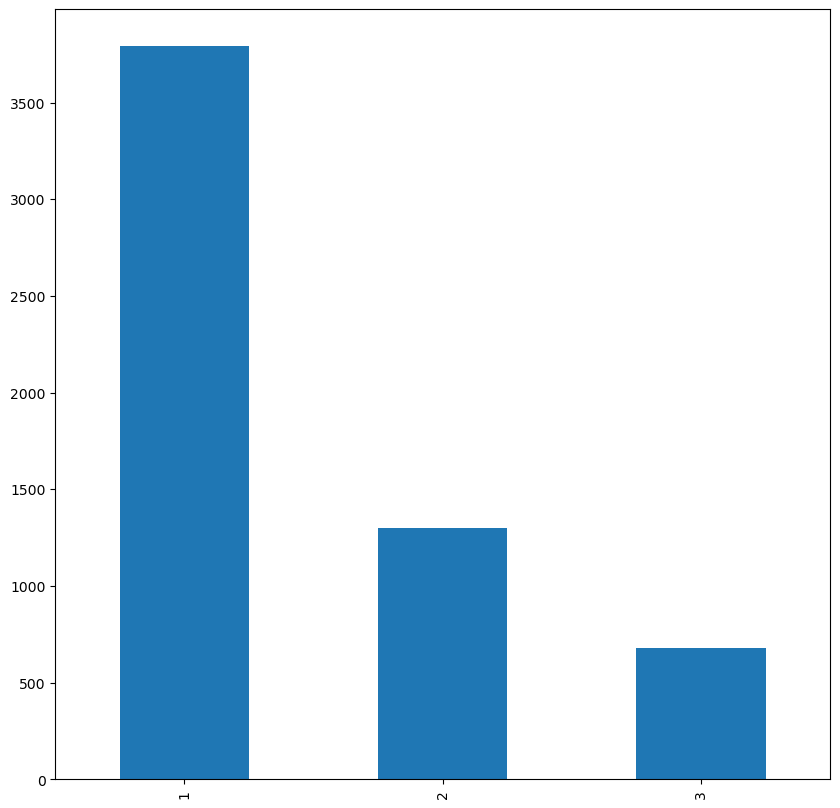

In [185]:
print(df["DODRace"].value_counts());
df["DODRace"].value_counts().plot(kind="bar",figsize=(10,10));
#Imbalanced data

In [186]:
df.head()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10027,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,Male,4-Oct-10,Fort Hood,Regular Army,Combat Arms,19D,North Dakota,1,1,41,71,180,Right hand
1,10032,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,1,1,35,68,160,Left hand
2,10033,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,2,2,42,68,205,Left hand
3,10092,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,338,367,986,640,458,461,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,88M,Wisconsin,1,1,31,66,175,Right hand
4,10093,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,332,372,1251,675,481,505,612,666,585,85,458,135,398,430,1572,132,523,

In [187]:
# Checking how many categorical column we have
categorical_columns = df.select_dtypes(include=['object']).columns
print(categorical_columns)

Index(['Gender', 'Date', 'Installation', 'Component', 'Branch', 'PrimaryMOS', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object')


In [188]:
# Find unique values for each categorical column
unique_values = {col: df[col].unique() for col in categorical_columns}

# Print the unique values for each categorical column
for col, values in unique_values.items():
    print(f"Unique values for column '{col}': {len(values)}")

Unique values for column 'Gender': 2
Unique values for column 'Date': 253
Unique values for column 'Installation': 12
Unique values for column 'Component': 3
Unique values for column 'Branch': 3
Unique values for column 'PrimaryMOS': 281
Unique values for column 'SubjectsBirthLocation': 136
Unique values for column 'WritingPreference': 3


In [189]:
df.SubjectsBirthLocation.value_counts()
# let's see if we can handle all these unique values

California                417
New York                  411
Texas                     386
Indiana                   264
Florida                   210
Illinois                  210
Oklahoma                  205
Minnesota                 194
Michigan                  194
Mississippi               193
Georgia                   168
Alabama                   164
South Carolina            161
North Carolina            145
Ohio                      139
Louisiana                 136
Pennsylvania              130
Virginia                  113
Massachusetts             109
Wisconsin                  99
Germany                    90
New Jersey                 88
Puerto Rico                88
Missouri                   83
Colorado                   78
Maryland                   78
Arizona                    75
Tennessee                  74
Kentucky                   67
Kansas                     62
Washington                 61
Iowa                       55
South Dakota               53
Arkansas  

In [190]:
# This is a dictionary of states and their regions.
states_by_region = {
    "Alabama": "South",
    "Alaska": "West",
    "Arizona": "West",
    "Arkansas": "South",
    "California": "West",
    "Colorado": "West",
    "Connecticut": "Northeast",
    "Delaware": "Mid Atlantic",
    "Florida": "South",
    "Georgia": "South",
    "Hawaii": "West",
    "Idaho": "West",
    "Illinois": "Midwest",
    "Indiana": "Midwest",
    "Iowa": "Midwest",
    "Kansas": "Midwest",
    "Kentucky": "South",
    "Louisiana": "South",
    "Maine": "Northeast",
    "Maryland": "Mid Atlantic",
    "Massachusetts": "Northeast",
    "Michigan": "Midwest",
    "Minnesota": "Midwest",
    "Mississippi": "South",
    "Missouri": "Midwest",
    "Montana": "West",
    "Nebraska": "Midwest",
    "Nevada": "West",
    "New Hampshire": "Northeast",
    "New Jersey": "Mid Atlantic",
    "New Mexico": "West",
    "New York": "Northeast",
    "North Carolina": "South",
    "North Dakota": "Midwest",
    "Ohio": "Midwest",
    "Oklahoma": "South",
    "Oregon": "West",
    "Pennsylvania": "Mid Atlantic",
    "Rhode Island": "Northeast",
    "South Carolina": "South",
    "South Dakota": "Midwest",
    "Tennessee": "South",
    "Texas": "South",
    "Utah": "West",
    "Vermont": "Northeast",
    "Virginia": "Mid Atlantic",
    "Washington": "West",
    "West Virginia": "South",
    "Wisconsin": "Midwest",
    "Wyoming": "West",
    "District of Columbia": "Mid Atlantic"
}

In [191]:
# This is a dictionary of the countries and their continents.
countries_by_continent = {
    "Afghanistan": "Asia",
    "Albania": "Europe",
    "Algeria": "Africa",
    "American Samoa": "Oceania",
    "Andorra": "Europe",
    "Angola": "Africa",
    "Antigua and Barbuda": "North America",
    "Argentina": "South America",
    "Armenia": "Asia",
    "Australia": "Oceania",
    "Austria": "Europe",
    "Azerbaijan": "Asia",
    "Bahamas": "North America",
    "Bahrain": "Asia",
    "Bangladesh": "Asia",
    "Barbados": "North America",
    "Belarus": "Europe",
    "Belgium": "Europe",
    "Belize": "North America",
    "Benin": "Africa",
    "Bhutan": "Asia",
    "Bolivia": "South America",
    "Bosnia and Herzegovina": "Europe",
    "Botswana": "Africa",
    "Brazil": "South America",
    "British Virgin Islands": "North America",
    "Brunei": "Asia",
    "Bulgaria": "Europe",
    "Burkina Faso": "Africa",
    "Burundi": "Africa",
    "Cambodia": "Asia",
    "Cameroon": "Africa",
    "Canada": "North America",
    "Cape Verde": "Africa",
    "Central African Republic": "Africa",
    "Chad": "Africa",
    "Chile": "South America",
    "China": "Asia",
    "Colombia": "South America",
    "Comoros": "Africa",
    "Congo, Democratic Republic of the": "Africa",
    "Congo, Republic of the": "Africa",
    "Costa Rica": "North America",
    "Côte d'Ivoire": "Africa",
    "Croatia": "Europe",
    "Cuba": "North America",
    "Cyprus": "Europe",
    "Czech Republic": "Europe",
    "Denmark": "Europe",
    "Djibouti": "Africa",
    "Dominica": "North America",
    "Dominican Republic": "North America",
    "East Timor": "Asia",
    "Ecuador": "South America",
    "Egypt": "Africa",
    "El Salvador": "North America",
    "England": "Europe",
    "Equatorial Guinea": "Africa",
    "Eritrea": "Africa",
    "Estonia": "Europe",
    "Eswatini": "Africa",
    "Ethiopia": "Africa",
    "Federated States of Micronesia": "Oceania",
    "Fiji": "Oceania",
    "Finland": "Europe",
    "France": "Europe",
    "French Guiana": "South America",
    "Gabon": "Africa",
    "Gambia": "Africa",
    "Georgia": "Asia",
    "Germany": "Europe",
    "Ghana": "Africa",
    "Greece": "Europe",
    "Grenada": "North America",
    "Guam": "Oceania",
    "Guadalupe" : "North America",
    "Guatemala": "North America",
    "Guinea": "Africa",
    "Guinea-Bissau": "Africa",
    "Guyana": "South America",
    "Haiti": "North America",
    "Honduras": "North America",
    "Hungary": "Europe",
    "Iceland": "Europe",
    "India": "Asia",
    "Indonesia": "Asia",
    "Iran": "Asia",
    "Iraq": "Asia",
    "Ireland": "Europe",
    "Israel": "Asia",
    "Italy": "Europe",
    "Ivory Coast": "Africa",
    "Jamaica": "North America",
    "Japan": "Asia",
    "Jordan": "Asia",
    "Kazakhstan": "Asia",
    "Kenya": "Africa",
    "Kiribati": "Oceania",
    "Kosovo": "Europe",
    "Kuwait": "Asia",
    "Kyrgyzstan": "Asia",
    "Laos": "Asia",
    "Latvia": "Europe",
    "Lebanon": "Asia",
    "Lesotho": "Africa",
    "Liberia": "Africa",
    "Libya": "Africa",
    "Liechtenstein": "Europe",
    "Lithuania": "Europe",
    "Luxembourg": "Europe",
    "Macedonia, Republic of": "Europe",
    "Madagascar": "Africa",
    "Malawi": "Africa",
    "Malaysia": "Asia",
    "Maldives": "Asia",
    "Mali": "Africa",
    "Malta": "Europe",
    "Marshall Islands": "Oceania",
    "Mauritania": "Africa",
    "Mauritius": "Africa",
    "Mexico": "North America",
    "Micronesia": "Oceania",
    "Moldova": "Europe",
    "Monaco": "Europe",
    "Mongolia": "Asia",
    "Montenegro": "Europe",
    "Morocco": "Africa",
    "Mozambique": "Africa",
    "Myanmar (Burma)": "Asia",
    "Namibia": "Africa",
    "Nauru": "Oceania",
    "Nepal": "Asia",
    "Netherlands": "Europe",
    "New Zealand": "Oceania",
    "Nicaragua": "North America",
    "Niger": "Africa",
    "Nigeria": "Africa",
    "North Korea": "Asia",
    "Norway": "Europe",
    "Oman": "Asia",
    "Pakistan": "Asia",
    "Palau": "Oceania",
    "Palestine": "Asia",
    "Panama": "North America",
    "Papua New Guinea": "Oceania",
    "Paraguay": "South America",
    "Peru": "South America",
    "Philippines": "Asia",
    "Poland": "Europe",
    "Portugal": "Europe",
    "Puerto Rico": "North America",
    "Qatar": "Asia",
    "Romania": "Europe",
    "Russia": "Europe",
    "Rwanda": "Africa",
    "Saint Kitts and Nevis": "North America",
    "Saint Lucia": "North America",
    "Saint Vincent and the Grenadines": "North America",
    "Samoa": "Oceania",
    "San Marino": "Europe",
    "Sao Tome and Principe": "Africa",
    "Saudi Arabia": "Asia",
    "Scotland": "Europe",
    "Senegal": "Africa",
    "Serbia": "Europe",
    "Seychelles": "Africa",
    "Sierra Leone": "Africa",
    "Singapore": "Asia",
    "Slovakia": "Europe",
    "Slovenia": "Europe",
    "Solomon Islands": "Oceania",
    "Somalia": "Africa",
    "South Africa": "Africa",
    "South Korea": "Asia",
    "South Sudan": "Africa",
    "Spain": "Europe",
    "Sri Lanka": "Asia",
    "Sudan": "Africa",
    "Suriname": "South America",
    "Swaziland": "Africa",
    "Sweden": "Europe",
    "Switzerland": "Europe",
    "Syria": "Asia",
    "Taiwan": "Asia",
    "Tajikistan": "Asia",
    "Tanzania": "Africa",
    "Thailand": "Asia",
    "Togo": "Africa",
    "Tonga": "Oceania",
    "Trinidad and Tobago": "North America",
    "Tunisia": "Africa",
    "Turkey": "Europe",
    "Turkmenistan": "Asia",
    "Tuvalu": "Oceania",
    "Uganda": "Africa",
    "Ukraine": "Europe",
    "United Arab Emirates": "Asia",
    "United Kingdom": "Europe",
    "United States": "North America",
    "Uruguay": "South America",
    "US Virgin Islands": "North America",
    "Uzbekistan": "Asia",
    "Vanuatu": "Oceania",
    "Vatican City": "Europe",
    "Venezuela": "South America",
    "Vietnam": "Asia",
    "Wales": "Europe",
    "Yemen": "Asia",
    "Zambia": "Africa",
    "Zimbabwe": "Africa",
    "South America": "South America",
    "Burma": "Asia",
    "Korea": "Asia",
    "Northern Mariana Islands": "Oceania",
    "Bermuda": "North America",
}

In [192]:
# to overcome the high cardinality problem in the SubjectsBirthLocation feature.
# We will use the following approach:
# 1. We will create a dictionary with the states by region
# 2. We will create a dictionary with the countries by continent
# 3. We will replace the values in the column "SubjectsBirthLocation" with the values from the dictionaries

df["SubjectsBirthLocation"] = [i if i in states_by_region else countries_by_continent[i] for i in df["SubjectsBirthLocation"].values ]
df["SubjectsBirthLocation"].value_counts()

California              417
New York                411
Texas                   386
North America           264
Indiana                 264
Florida                 210
Illinois                210
Oklahoma                205
Minnesota               194
Michigan                194
Mississippi             193
Georgia                 168
Alabama                 164
South Carolina          161
Europe                  146
North Carolina          145
Ohio                    139
Louisiana               136
Pennsylvania            130
Virginia                113
Massachusetts           109
Wisconsin                99
New Jersey               88
Missouri                 83
Maryland                 78
Colorado                 78
Arizona                  75
Tennessee                74
Kentucky                 67
Kansas                   62
Washington               61
Iowa                     55
South Dakota             53
Arkansas                 53
South America            43
Oregon              

In [193]:
# Great 57 unique value, still high but better
df["SubjectsBirthLocation"].nunique()

57

In [194]:
# Mapping the Target column
df["DODRace"] = df.DODRace.map({1 : "White", 2 : "Black", 3 : "Hispanic"})
df.DODRace.value_counts()

White       3792
Black       1298
Hispanic     679
Name: DODRace, dtype: int64

In [195]:
df.groupby(["Component"])["DODRace"].value_counts(normalize=True)

# When we compare the distribution of the soldiers according to the units
# they serve, the white, black, hispanic distribution in the 3 units is similar
# or close to the general distribution in the original data.
# There is no component dominated by Hispanic race. We were unable to obtain
# insight into the identification of race through Component feature.

Component            DODRace 
Army National Guard  White      0.712
                     Black      0.191
                     Hispanic   0.097
Army Reserve         White      0.551
                     Black      0.251
                     Hispanic   0.198
Regular Army         White      0.617
                     Black      0.253
                     Hispanic   0.130
Name: DODRace, dtype: float64

In [196]:
ct = pd.crosstab( df.Component,df.DODRace, margins=True, margins_name="Total", normalize='index')
ct

DODRace,Black,Hispanic,White
Component,,,
Army National Guard,0.191,0.097,0.712
Army Reserve,0.251,0.198,0.551
Regular Army,0.253,0.130,0.617
Total,0.225,0.118,0.657


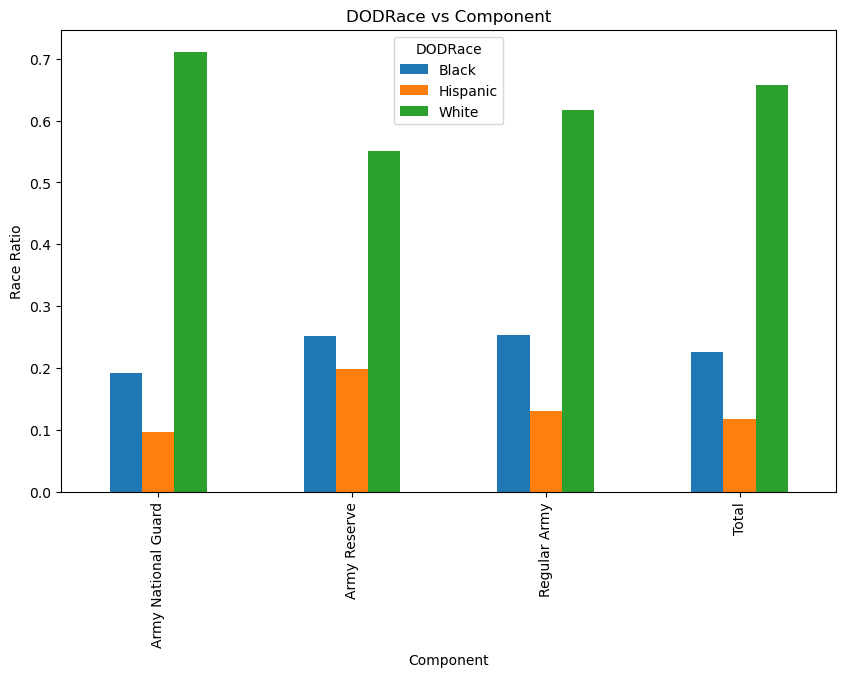

In [197]:
ct.plot(kind='bar')
plt.title('DODRace vs Component')
plt.xlabel('Component')
plt.ylabel('Race Ratio')
plt.show()
# We can see that they are at the same order White, Black, Hispanic

In [198]:
df.groupby(["Component", "Branch"])["DODRace"].value_counts(normalize=True)

# we obtained insights similar to the insights we obtained above.
# There are no Hispanic-dominated components or branches.
# We will drop "Component", "Branch" features.

Component            Branch                  DODRace 
Army National Guard  Combat Arms             White      0.803
                                             Black      0.102
                                             Hispanic   0.095
                     Combat Service Support  White      0.669
                                             Black      0.228
                                             Hispanic   0.104
                     Combat Support          White      0.685
                                             Black      0.235
                                             Hispanic   0.080
Army Reserve         Combat Arms             White      0.833
                                             Hispanic   0.167
                     Combat Service Support  White      0.603
                                             Hispanic   0.221
                                             Black      0.176
                     Combat Support          Black      0.431
                

In [199]:
ct = pd.crosstab( df.DODRace, [df.Component, df.Branch],  margins=True, margins_name="Total", normalize='columns')
ct

Component Army National Guard                                       Army Reserve                                       Regular Army                                       Total
Branch            Combat Arms Combat Service Support Combat Support  Combat Arms Combat Service Support Combat Support  Combat Arms Combat Service Support Combat Support      
DODRace                                                                                                                                                                        
Black                   0.102                  0.228          0.235        0.000                  0.176          0.431        0.129                  0.270          0.341 0.225
Hispanic                0.095                  0.104          0.080        0.167                  0.221          0.154        0.157                  0.127          0.109 0.118
White                   0.803                  0.669          0.685        0.833                  0.603          0.415        0.713                  0.602          0.550 0.657

In [200]:
df.SubjectNumericRace.value_counts()
# a feature describing our target DODRace.
# We will drop it as it will cause data leakage.

1        3559
2        1025
3         541
31        159
8         106
51        102
21         60
23         34
28         26
251        20
41         19
18         16
61         15
25         13
38          9
351         9
231         6
42          6
62          6
35          5
235         4
43          3
63          3
218         3
431         2
2351        2
423         2
2518        2
4251        1
238         1
318         1
451         1
4           1
425         1
428         1
651         1
6           1
631         1
358         1
42351       1
Name: SubjectNumericRace, dtype: int64

In [201]:
drop_list_nonnumeric = ["Date", "Installation", "Component","Branch","Weightlbs","Heightin","SubjectNumericRace","PrimaryMOS","subjectid"]
df.drop(drop_list_nonnumeric, axis=1, inplace=True)

In [202]:
df.shape

(5769, 98)

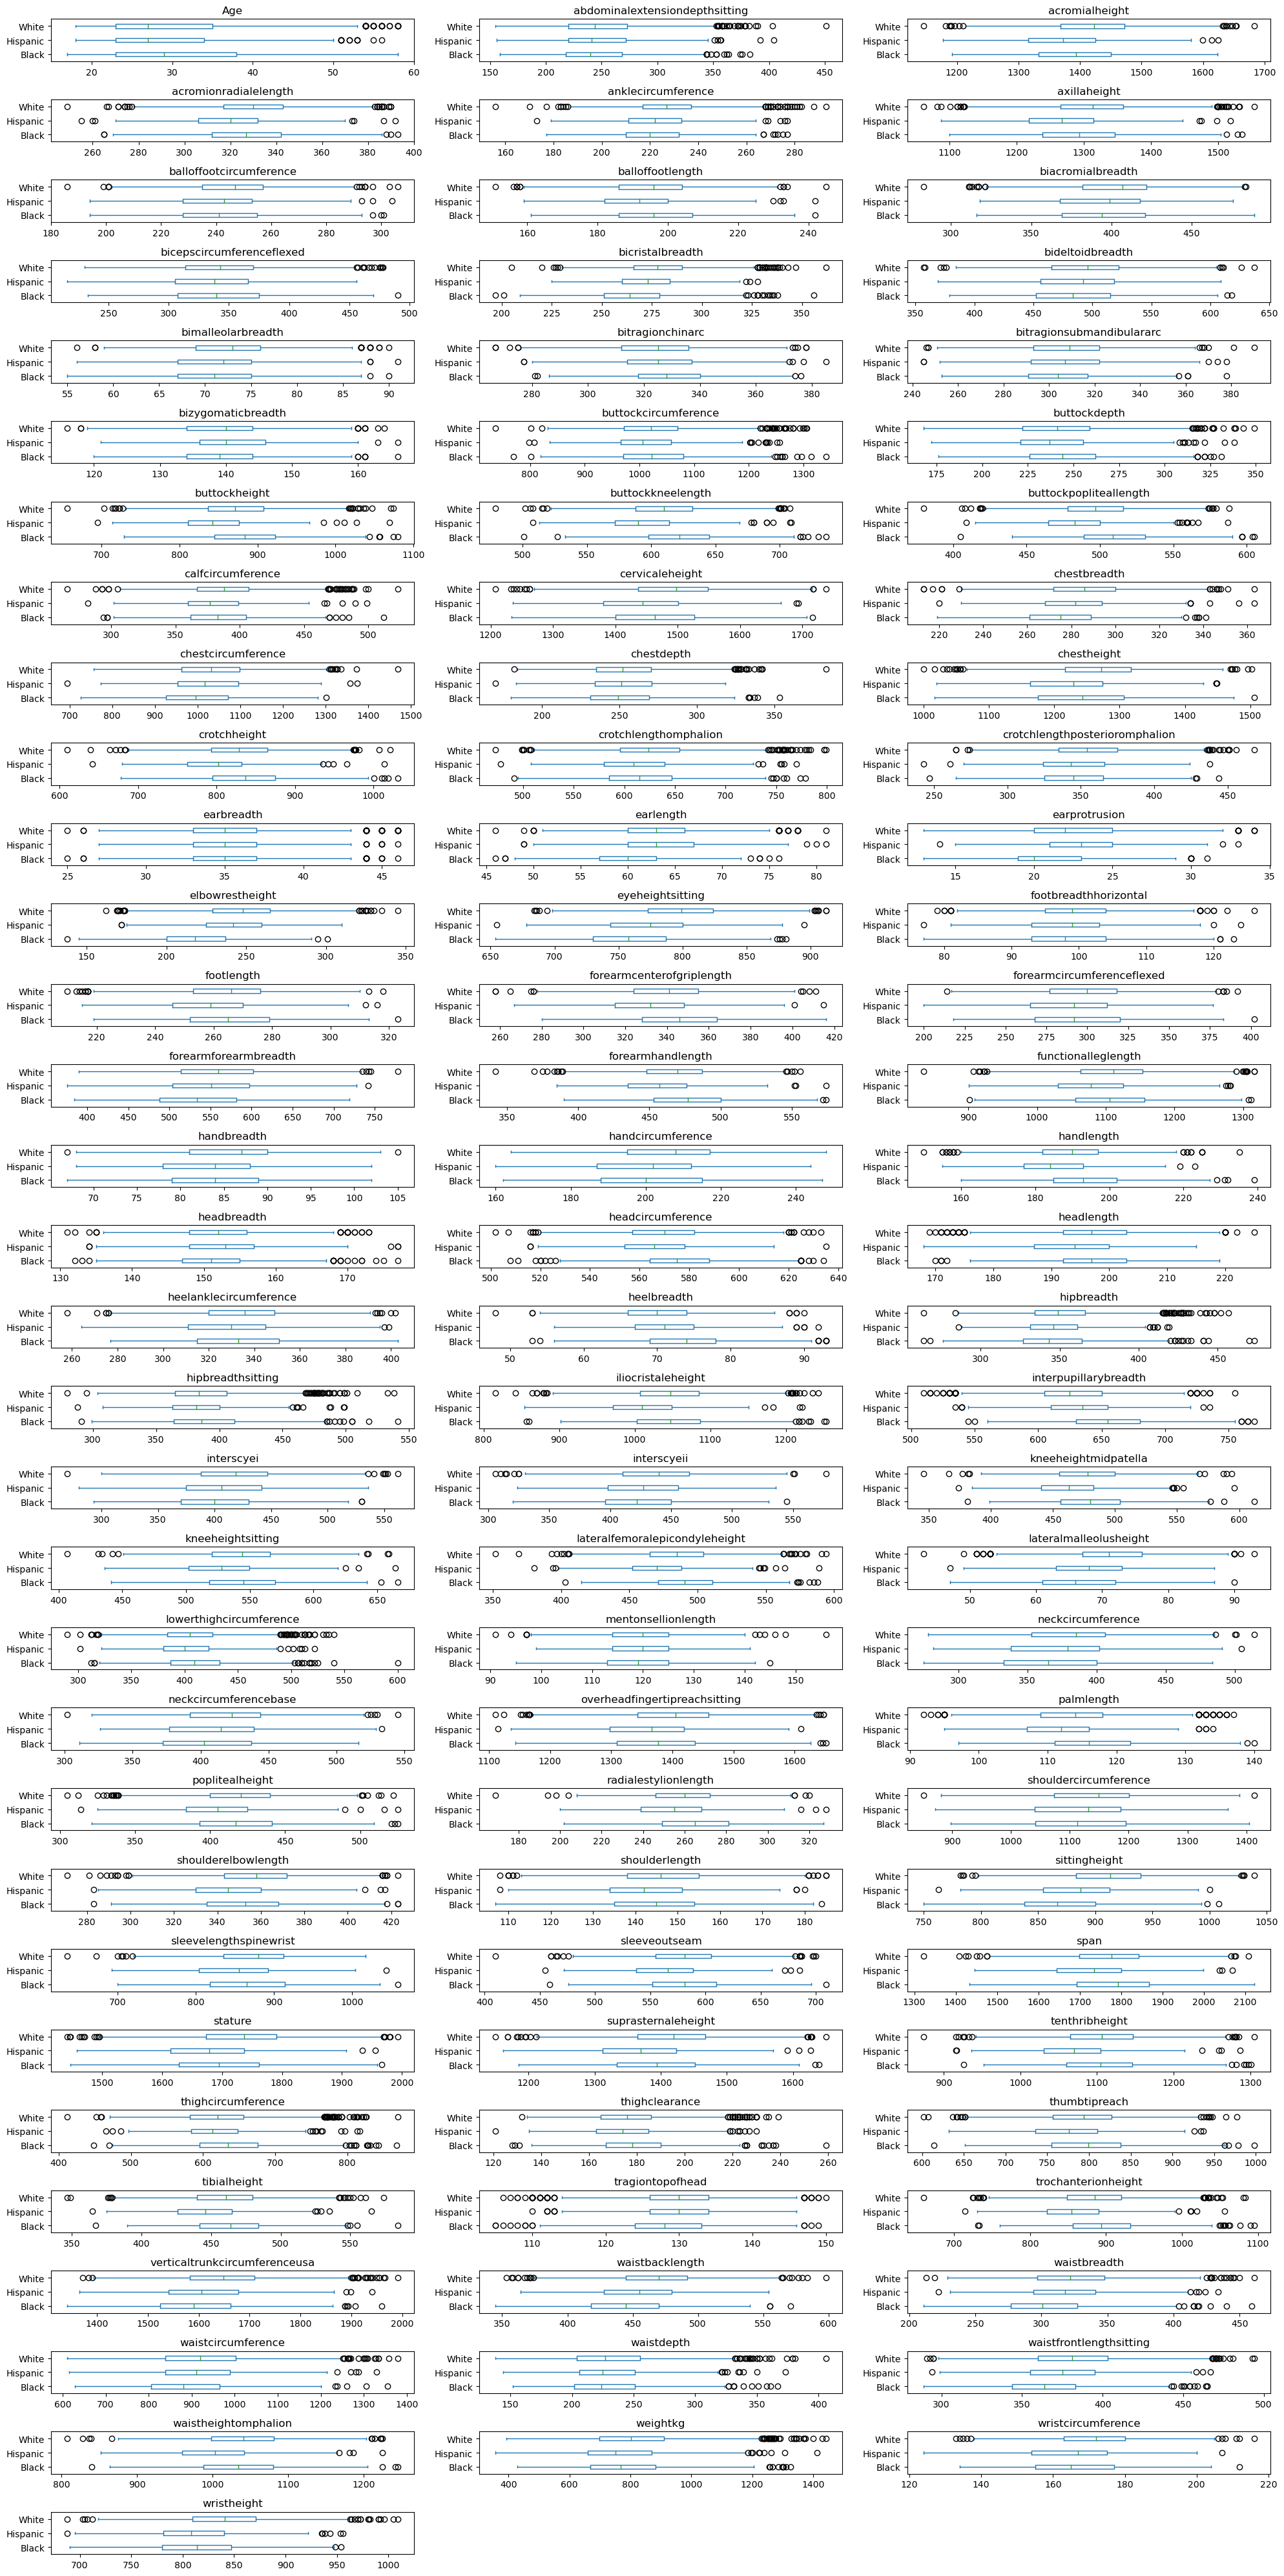

In [203]:
df.plot(by ='DODRace', kind="box", subplots=True, layout=(32, 3), figsize=(20, 40), vert=False, sharex=False, sharey=False)
plt.tight_layout();

In [204]:
# We confirmed that what we found out in basic statistics of dataframe
# We don't have many outliers in the data to effect the standart deviation
# Since mean and standard deviation are not very close to each other.
# Another important point to note is that we need to look at outliers in terms of target classes.
# For example, for the age feature black class has no outliers.

In [205]:
df.sample(5)

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,SubjectsBirthLocation,DODRace,Age,WritingPreference
4248,240,1375,324,231,1269,243,194,382,340,263,474,70,325,304,136,1051,240,864,617,496,408,1436,272,1032,271,1187,783,624,383,38,66,20,217,750,102,263,360,295,518,479,1098,86,198,202,153,587,196,338,74,353,406,1033,635,427,450,458,529,473,69,405,123,337,368,1412,123,401,266,1122,355,149,844,855,575,1796,1661,1373,1091,669,184,772,446,115,878,1563,445,306,897,209,355,1012,771,163,793,Female,Maryland,Black,39,Right hand
3816,249,1430,338,223,1330,251,201,424,337,257,502,72,340,321,139,1022,249,910,644,538,385,1528,283,1019,250,1337,837,625,341,37,63,22,238,838,104,266,342,292,543,485,1143,92,217,201,155,579,203,342,69,344,378,1082,615,458,475,484,549,497,70,394,130,411,458,1414,108,438,268,1165,372,155,960,920,610,1817,1793,1455,1157,610,162,778,463,133,896,1663,482,315,912,239,397,1073,826,177,838,Male,Oklahoma,White,22,Right hand
2659,188,1368,334,190,1286,218,193,407,280,238,467,70,316,293,136,828,190,911,603,507,318,1450,251,866,202,1258,871,513,344,34,54,22,167,713,93,263,343,265,535,482,1092,78,189,194,152,558,194,312,72,277,299,1046,640,380,405,486,540,493,67,347,122,361,401,1347,117,439,267,1086,358,156,836,871,590,1814,1690,1377,1091,485,140,815,460,134,913,1421,431,243,698,174,323,1035,567,159,777,Male,Illinois,Black,20,Left hand
2031,214,1385,337,223,1272,244,194,418,326,252,488,71,330,304,148,931,218,861,576,469,375,1480,283,962,223,1235,795,562,332,36,62,22,244,818,98,261,327,300,513,461,1049,87,213,194,158,573,191,327,67,320,356,1025,660,430,472,442,517,452,67,377,120,383,429,1460,125,404,253,1168,363,162,931,884,570,1754,1715,1381,1070,574,162,796,425,130,866,1575,491,291,818,206,378,1005,714,177,807,Male,Minnesota,White,23,Right hand
840,294,1401,351,243,1287,265,197,433,394,253,539,75,341,316,141,998,252,887,630,506,431,1491,296,1130,270,1261,842,610,360,33,62,21,171,731,106,273,355,330,603,486,1177,86,212,200,164,608,210,356,81,308,369,1042,645,421,445,488,568,494,83,431,122,411,448,1440,121,421,271,1261,377,159,848,891,614,1885,1716,1410,1107,657,189,805,477,145,901,1668,464,330,984,256,367,1041,939,176,797,Male,New York,Black,46,Right hand


In [206]:
# Applying one hot encoder
cat_onehot = ['Gender','SubjectsBirthLocation', 'WritingPreference']

In [207]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

column_trans = make_column_transformer(
                        (OneHotEncoder(handle_unknown="ignore", sparse=False), cat_onehot),
                      
                         remainder='passthrough',
                         verbose_feature_names_out=False)

column_trans=column_trans.set_output(transform="pandas")

# DATA Preprocessing
- In this step we divide our data to X(Features) and y(Target) then ,
- To train and evaluation purposes we create train and test sets,
- Lastly, scale our data if features not in same scale. Why?

In [208]:
X= df.drop("DODRace",axis=1)
y= df.DODRace

In [209]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [210]:
X_train = column_trans.fit_transform(X_train)
X_test = column_trans.transform(X_test)

In [211]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (4615, 155)
Train target shape   :  (4615,)
Test features shape  :  (1154, 155)
Test target shape    :  (1154,)


In [212]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modelling
- Fit the model with train dataset
- Get predict from vanilla model on both train and test sets to examine if there is over/underfitting   
- Apply GridseachCV for both hyperparemeter tuning and sanity test of our model.
- Use hyperparameters that you find from gridsearch and make final prediction and evaluate the result according to chosen metric.

## 1. Logistic model

### Vanilla Logistic Model

In [213]:
logistic_model = LogisticRegression(class_weight='balanced',max_iter=10000,random_state=42)
logistic_model.fit(X_train,y_train)

LogisticRegression(class_weight='balanced', max_iter=10000, random_state=42)

In [214]:
y_pred = logistic_model.predict(X_test)

In [87]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [215]:
eval_metric(logistic_model, X_train, y_train, X_test, y_test)

Test_Set
[[256  14  12]
 [  5 113  21]
 [ 15  86 632]]
              precision    recall  f1-score   support

       Black       0.93      0.91      0.92       282
    Hispanic       0.53      0.81      0.64       139
       White       0.95      0.86      0.90       733

    accuracy                           0.87      1154
   macro avg       0.80      0.86      0.82      1154
weighted avg       0.89      0.87      0.88      1154


Train_Set
[[ 947   45   24]
 [  21  453   66]
 [  55  348 2656]]
              precision    recall  f1-score   support

       Black       0.93      0.93      0.93      1016
    Hispanic       0.54      0.84      0.65       540
       White       0.97      0.87      0.92      3059

    accuracy                           0.88      4615
   macro avg       0.81      0.88      0.83      4615
weighted avg       0.91      0.88      0.89      4615



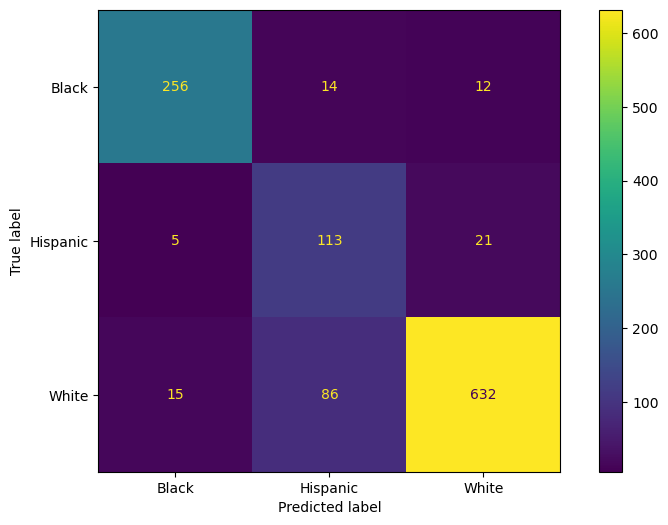

In [216]:
ConfusionMatrixDisplay.from_estimator(logistic_model, X_test, y_test);

In [217]:
scoring = {
    "precision_Hispanic": make_scorer(
        precision_score, average=None, labels=["Hispanic"]
    ),
    "recall_Hispanic": make_scorer(recall_score, average=None, labels=["Hispanic"]),
    "f1_Hispanic": make_scorer(f1_score, average=None, labels=["Hispanic"]),
}

In [218]:
model = LogisticRegression(class_weight='balanced',max_iter=5000,random_state=42)

scores = cross_validate(model, X_train, y_train, scoring = scoring , cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision_Hispanic    0.476
train_precision_Hispanic   0.533
test_recall_Hispanic       0.748
train_recall_Hispanic      0.844
test_f1_Hispanic           0.581
train_f1_Hispanic          0.654
dtype: float64

### Logistic Model GridsearchCV

In [159]:
recall_Hispanic = make_scorer(recall_score, average=None, labels=["Hispanic"])

In [219]:
CVmodel = LogisticRegression(class_weight='balanced',max_iter=10000,random_state=42) 

In [220]:
penalty = ["l1", "l2"]
C = [0.01, 0.1, 1, 5, 16, 19, 22, 25]
log__solver = ["liblinear", "lbfgs"]

param_grid = {
    "penalty": penalty,
    "C": C,
    "solver": log__solver
}

In [221]:
grid_model = GridSearchCV(CVmodel, param_grid=param_grid, scoring=recall_Hispanic, cv=10, n_jobs=-1, return_train_score=True)
grid_model.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=LogisticRegression(class_weight='balanced',
                                          max_iter=10000, random_state=42),
             n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 5, 16, 19, 22, 25],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'lbfgs']},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']))

In [222]:
grid_model.best_params_

{'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}

In [223]:
pd.DataFrame(grid_model.cv_results_).loc[grid_model.best_index_, ["mean_test_score", "mean_train_score"]]

mean_test_score    0.776
mean_train_score   0.821
Name: 3, dtype: object

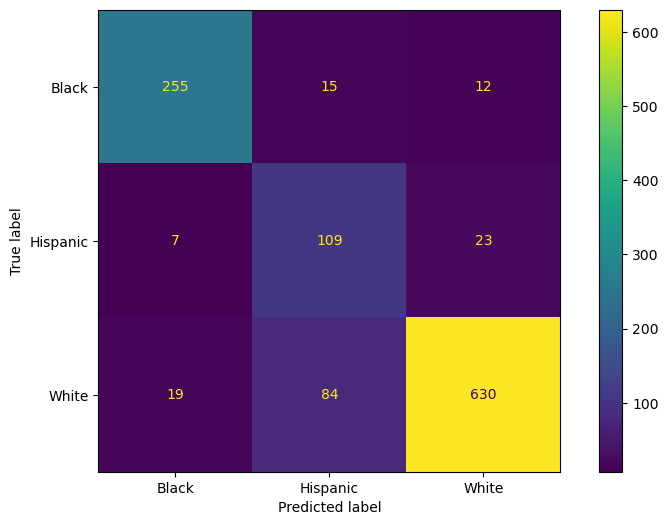

In [224]:
ConfusionMatrixDisplay.from_estimator(grid_model, X_test, y_test);

In [225]:
eval_metric(grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[255  15  12]
 [  7 109  23]
 [ 19  84 630]]
              precision    recall  f1-score   support

       Black       0.91      0.90      0.91       282
    Hispanic       0.52      0.78      0.63       139
       White       0.95      0.86      0.90       733

    accuracy                           0.86      1154
   macro avg       0.79      0.85      0.81      1154
weighted avg       0.89      0.86      0.87      1154


Train_Set
[[ 927   56   33]
 [  28  442   70]
 [  61  372 2626]]
              precision    recall  f1-score   support

       Black       0.91      0.91      0.91      1016
    Hispanic       0.51      0.82      0.63       540
       White       0.96      0.86      0.91      3059

    accuracy                           0.87      4615
   macro avg       0.79      0.86      0.82      4615
weighted avg       0.90      0.87      0.88      4615




[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: pip install --upgrade pip


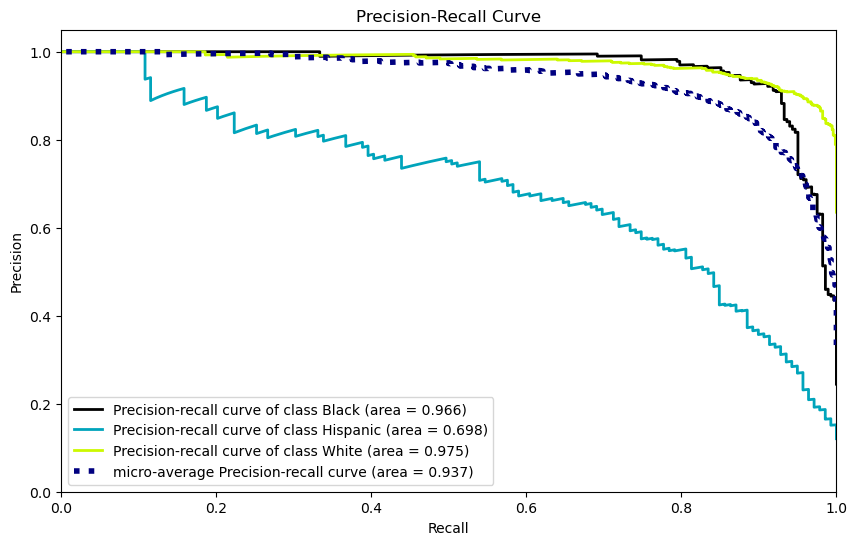

In [227]:
!pip3 install scikit-plot
from scikitplot.metrics import plot_roc, plot_precision_recall


model = LogisticRegression(class_weight='balanced', max_iter=10000, random_state=42)

model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_test)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

## 2. SVC

### Vanilla SVC model

In [228]:
SVCmodel = SVC(class_weight="balanced", random_state=101)

In [229]:
SVCmodel.fit(X_train, y_train)
eval_metric(SVCmodel, X_train, y_train, X_test, y_test)

Test_Set
[[252  16  14]
 [  6 102  31]
 [ 16  89 628]]
              precision    recall  f1-score   support

       Black       0.92      0.89      0.91       282
    Hispanic       0.49      0.73      0.59       139
       White       0.93      0.86      0.89       733

    accuracy                           0.85      1154
   macro avg       0.78      0.83      0.80      1154
weighted avg       0.88      0.85      0.86      1154


Train_Set
[[ 973   19   24]
 [   9  495   36]
 [  33  275 2751]]
              precision    recall  f1-score   support

       Black       0.96      0.96      0.96      1016
    Hispanic       0.63      0.92      0.74       540
       White       0.98      0.90      0.94      3059

    accuracy                           0.91      4615
   macro avg       0.85      0.92      0.88      4615
weighted avg       0.93      0.91      0.92      4615



In [230]:
model = SVC(class_weight="balanced", random_state=101)

scores = cross_validate(model, X_train, y_train, scoring=recall_Hispanic, cv = 10, n_jobs=-1, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_score    0.735
train_score   0.923
dtype: float64

###  SVC Model GridsearchCV

In [231]:
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': [0.001, 0.01, 0.1],
}

In [232]:
model = SVC(class_weight="balanced", random_state=101)

svm_model_grid = GridSearchCV(
    model,
    param_grid,
    scoring=recall_Hispanic,
    cv=10,
    n_jobs=-1,
    return_train_score=True,
)

In [234]:
svm_model_grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVC(class_weight='balanced', random_state=101),
             n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'gamma': [0.001, 0.01, 0.1],
                         'kernel': ['linear', 'rbf', 'poly']},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']))

In [235]:
svm_model_grid.best_params_

{'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}

In [236]:
svm_model_grid.best_estimator_

SVC(C=0.1, class_weight='balanced', gamma=0.1, random_state=101)

In [237]:
pd.DataFrame(svm_model_grid.cv_results_).loc[svm_model_grid.best_index_, ["mean_test_score", "mean_train_score"]]

mean_test_score    0.900
mean_train_score   0.900
Name: 7, dtype: object

In [238]:
y_pred = svm_model_grid.predict(X_test)
y_pred

array(['Hispanic', 'Hispanic', 'Hispanic', ..., 'Hispanic', 'Hispanic',
       'Hispanic'], dtype=object)

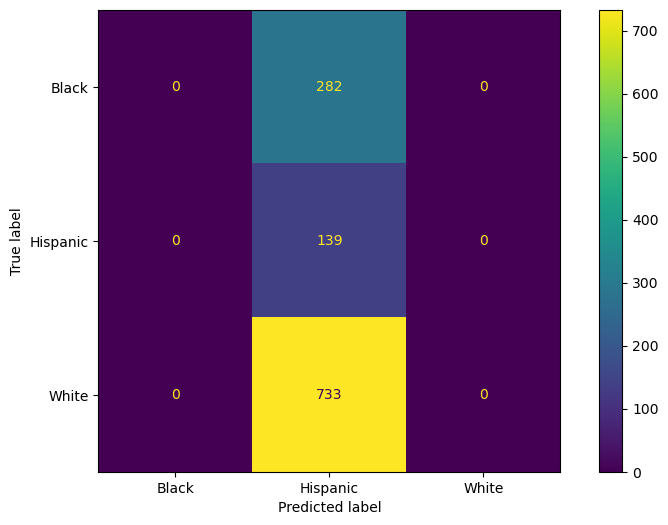

In [239]:
ConfusionMatrixDisplay.from_estimator(svm_model_grid, X_test, y_test);

In [240]:
eval_metric(svm_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[  0 282   0]
 [  0 139   0]
 [  0 733   0]]
              precision    recall  f1-score   support

       Black       0.00      0.00      0.00       282
    Hispanic       0.12      1.00      0.22       139
       White       0.00      0.00      0.00       733

    accuracy                           0.12      1154
   macro avg       0.04      0.33      0.07      1154
weighted avg       0.01      0.12      0.03      1154


Train_Set
[[   0 1016    0]
 [   0  540    0]
 [   0 3059    0]]
              precision    recall  f1-score   support

       Black       0.00      0.00      0.00      1016
    Hispanic       0.12      1.00      0.21       540
       White       0.00      0.00      0.00      3059

    accuracy                           0.12      4615
   macro avg       0.04      0.33      0.07      4615
weighted avg       0.01      0.12      0.02      4615



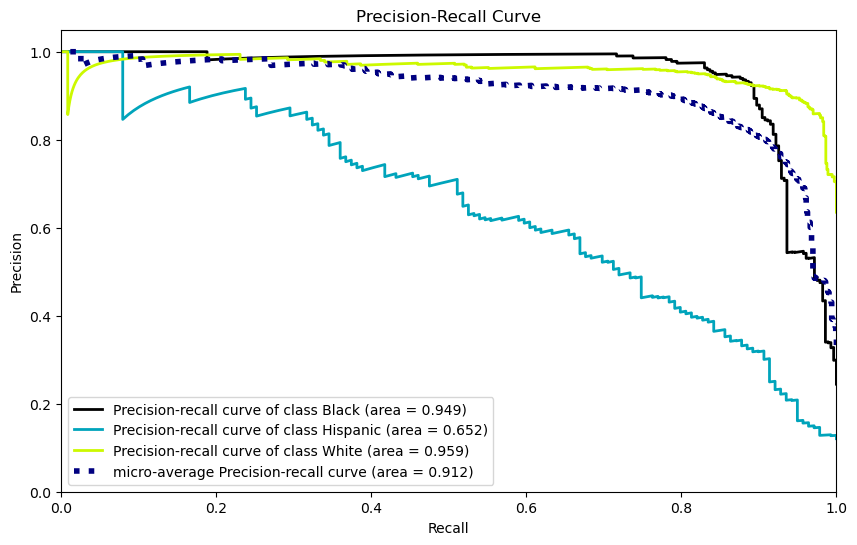

In [241]:
from scikitplot.metrics import plot_roc, plot_precision_recall


model = SVC(C=1, class_weight='balanced', random_state=101)

model.fit(X_train, y_train)
decision_function = model.decision_function(X_test)

# y_pred_proba = model.predict_proba(X_test)

plot_precision_recall(y_test, decision_function)
plt.show();

## 3. RF

### Vanilla RF Model

In [242]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=101, class_weight='balanced')
rf_model.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', random_state=101)

In [243]:
y_pred = rf_model.predict(X_test)

In [244]:
eval_metric(rf_model, X_train, y_train, X_test, y_test)

Test_Set
[[188   0  94]
 [ 10  14 115]
 [  7   2 724]]
              precision    recall  f1-score   support

       Black       0.92      0.67      0.77       282
    Hispanic       0.88      0.10      0.18       139
       White       0.78      0.99      0.87       733

    accuracy                           0.80      1154
   macro avg       0.86      0.59      0.61      1154
weighted avg       0.82      0.80      0.76      1154


Train_Set
[[1016    0    0]
 [   0  540    0]
 [   0    0 3059]]
              precision    recall  f1-score   support

       Black       1.00      1.00      1.00      1016
    Hispanic       1.00      1.00      1.00       540
       White       1.00      1.00      1.00      3059

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



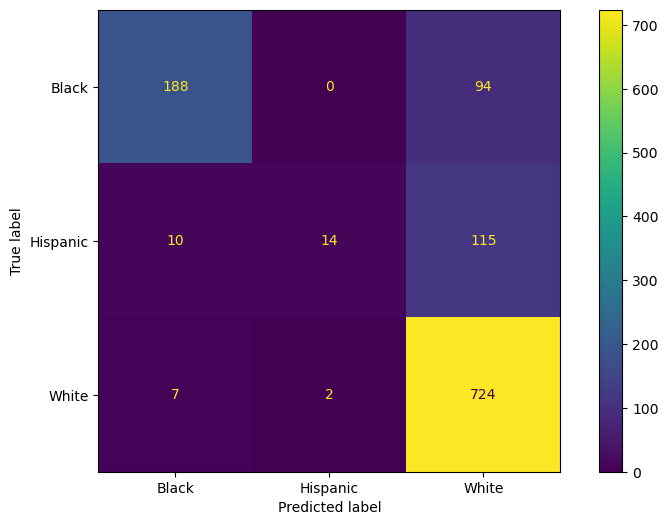

In [245]:
ConfusionMatrixDisplay.from_estimator(rf_model, X_test, y_test);

In [246]:
model = RandomForestClassifier(class_weight="balanced", random_state=101)

scores = cross_validate(
    model, X_train, y_train, scoring=scoring, cv=5, n_jobs=-1, return_train_score=True
)
df_scores = pd.DataFrame(scores, index=range(1, 6))
df_scores.mean()[2:]

test_precision_Hispanic    0.836
train_precision_Hispanic   1.000
test_recall_Hispanic       0.081
train_recall_Hispanic      1.000
test_f1_Hispanic           0.148
train_f1_Hispanic          1.000
dtype: float64

### RF Model GridsearchCV

In [247]:
model = RandomForestClassifier(class_weight='balanced', random_state=101)

In [248]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

In [249]:
grid_search = GridSearchCV(model, param_grid,scoring=recall_Hispanic, n_jobs=-1, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=101),
             n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']))

In [250]:
grid_search.best_params_

{'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 300}

In [251]:
grid_search.best_estimator_

RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_split=10, n_estimators=300,
                       random_state=101)

In [252]:
y_pred = grid_model.predict(X_test)

In [253]:
eval_metric(grid_search, X_train, y_train, X_test, y_test)

Test_Set
[[225   7  50]
 [ 11  56  72]
 [ 26  34 673]]
              precision    recall  f1-score   support

       Black       0.86      0.80      0.83       282
    Hispanic       0.58      0.40      0.47       139
       White       0.85      0.92      0.88       733

    accuracy                           0.83      1154
   macro avg       0.76      0.71      0.73      1154
weighted avg       0.82      0.83      0.82      1154


Train_Set
[[ 985    0   31]
 [   2  510   28]
 [  21   43 2995]]
              precision    recall  f1-score   support

       Black       0.98      0.97      0.97      1016
    Hispanic       0.92      0.94      0.93       540
       White       0.98      0.98      0.98      3059

    accuracy                           0.97      4615
   macro avg       0.96      0.96      0.96      4615
weighted avg       0.97      0.97      0.97      4615



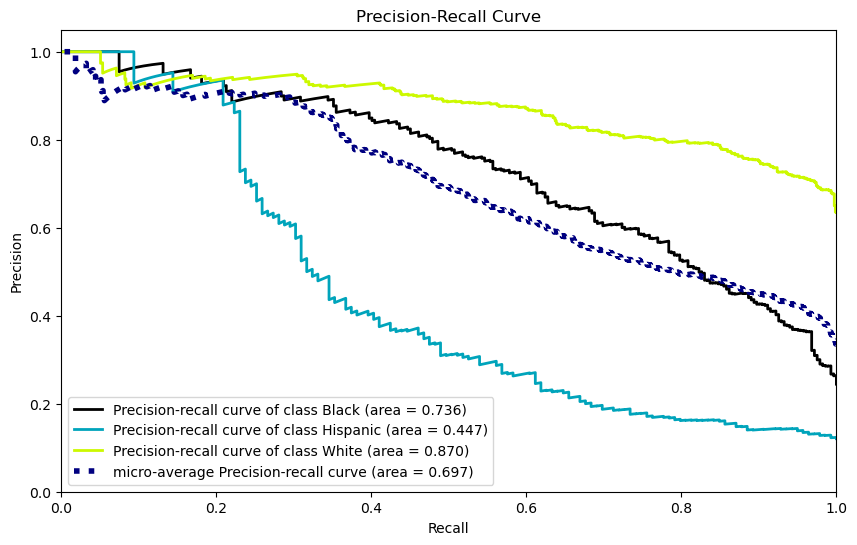

In [254]:
model = RandomForestClassifier(class_weight="balanced", max_depth=2, n_estimators=400, random_state=101)

model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_test)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

## 4. XGBoost

### Vanilla XGBoost Model

In [255]:
import xgboost as xgb

In [256]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [257]:
XGBmodel = xgb.XGBClassifier(random_state=101)

In [258]:
XGBmodel.fit(X_train, y_train_encoded)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [259]:
eval_metric(XGBmodel, X_train, y_train_encoded, X_test, y_test_encoded)

Test_Set
[[243   3  36]
 [  9  58  72]
 [ 17  10 706]]
              precision    recall  f1-score   support

           0       0.90      0.86      0.88       282
           1       0.82      0.42      0.55       139
           2       0.87      0.96      0.91       733

    accuracy                           0.87      1154
   macro avg       0.86      0.75      0.78      1154
weighted avg       0.87      0.87      0.86      1154


Train_Set
[[1016    0    0]
 [   0  540    0]
 [   0    0 3059]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1016
           1       1.00      1.00      1.00       540
           2       1.00      1.00      1.00      3059

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



In [260]:
from sklearn.utils import class_weight

classes_weights = class_weight.compute_sample_weight(
    class_weight="balanced", y=y_train_encoded
)
classes_weights

# XGboost algorithm has no class_weight hyperparameter for multiclass.
# We can use the sample_weight hyperparameter within the fit function.

array([2.84876543, 0.50288765, 0.50288765, ..., 0.50288765, 0.50288765,
       0.50288765])

In [261]:
my_dict = {"weights": classes_weights, "label": y_train_encoded}

comp = pd.DataFrame(my_dict)

comp.head()

,weights,label
0,2.849,1
1,0.503,2
2,0.503,2
3,0.503,2
4,1.514,0


In [262]:
comp.groupby("label").value_counts()

label  weights
0      1.514      1016
1      2.849       540
2      0.503      3059
dtype: int64

In [263]:
scoring_xgb = {
    "precision_Hispanic": make_scorer(precision_score, average=None, labels=[1]),
    "recall_Hispanic": make_scorer(recall_score, average=None, labels=[1]),
    "f1_Hispanic": make_scorer(f1_score, average=None, labels=[1]),
}

In [264]:
model = xgb.XGBClassifier(random_state=101)

scores = cross_validate(
    model,
    X_train,
    y_train_encoded,
    scoring=scoring_xgb,
    cv=5,
    n_jobs=-1,
    return_train_score=True
)
df_scores = pd.DataFrame(scores, index=range(1, 6))
df_scores.mean()[2:]

test_precision_Hispanic    0.754
train_precision_Hispanic   1.000
test_recall_Hispanic       0.409
train_recall_Hispanic      1.000
test_f1_Hispanic           0.528
train_f1_Hispanic          1.000
dtype: float64

### XGBoost Model GridsearchCV

In [265]:
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'n_estimators': [100, 200, 300]
}

In [266]:
XGBmodel = XGBClassifier(random_state=101)

In [267]:
grid_model = GridSearchCV(
    XGBmodel, param_grid=param_grid, scoring=recall_Hispanic, cv=10, n_jobs=-1, return_train_score=True
)

In [268]:
grid_model.fit(X_train, y_train_encoded)

/Users/thamer-gahtani/anaconda3/lib/python3.11/site-packages/numpy/lib/arraysetops.py:729: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/Users/thamer-gahtani/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/thamer-gahtani/anaconda3/lib/python3.11/site-packages/numpy/lib/arraysetops.py:729: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/Users/thamer-gahtani/anaconda3/lib/python3.11/site-packages/numpy/lib/arraysetops.py:729: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  m

GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=101, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']))

In [269]:
grid_model.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [270]:
grid_model.best_params_

{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}

In [271]:
eval_metric(grid_model, X_train, y_train_encoded, X_test, y_test_encoded)

Test_Set
[[152   6 124]
 [ 14  41  84]
 [ 20   4 709]]
              precision    recall  f1-score   support

           0       0.82      0.54      0.65       282
           1       0.80      0.29      0.43       139
           2       0.77      0.97      0.86       733

    accuracy                           0.78      1154
   macro avg       0.80      0.60      0.65      1154
weighted avg       0.79      0.78      0.76      1154


Train_Set
[[ 596   27  393]
 [  56  152  332]
 [  67   11 2981]]
              precision    recall  f1-score   support

           0       0.83      0.59      0.69      1016
           1       0.80      0.28      0.42       540
           2       0.80      0.97      0.88      3059

    accuracy                           0.81      4615
   macro avg       0.81      0.61      0.66      4615
weighted avg       0.81      0.81      0.78      4615



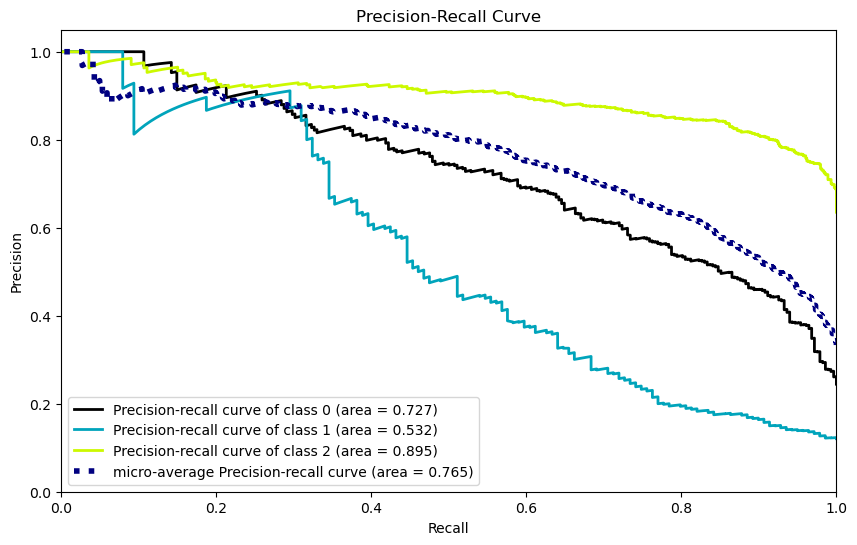

In [272]:
model = XGBClassifier(
            colsample_bytree=0.8,
            learning_rate=0.05,
            max_depth=2,
            n_estimators=20,
            subsample=0.8,
            random_state=101,
        )
model.fit(X_train, y_train_encoded, sample_weight=classes_weights)

y_pred_proba = model.predict_proba(X_test)

plot_precision_recall(y_test_encoded, y_pred_proba)
plt.show()

---
Final Model
---

In [273]:
# Logistic Regression:

# Test Set Accuracy: 0.87
# Test Set Precision, Recall, F1-score for Hispanic class: Precision 0.476, Recall 0.748, F1-score 0.581

# Support Vector Classifier (SVC):

# Test Set Accuracy: 0.85
# Test Set Precision, Recall, F1-score for Hispanic class: Precision 0.12, Recall 1.00, F1-score 0.22 (Note: Precision for Hispanic is low)

# Random Forest:

# Test Set Accuracy (Vanilla): 0.80
# Test Set Accuracy (GridSearchCV): 0.87
# (OverFitting)

# XGBoost:

# Test Set Accuracy: 0.87
# Test Set Precision, Recall, F1-score for Hispanic class: Precision 0.85, Recall 0.41, F1-score 0.55

In [274]:
# I decided to use Logistic Regression
operations_final = [
    ("OneHotEncoder", column_trans),
    (
        "log",
        LogisticRegression(class_weight="balanced", max_iter=10000, random_state=101),
    ),
]

In [275]:
finalModel = Pipeline(steps=operations_final)

In [276]:
finalModel.fit(X, y)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Gender',
                                                   'SubjectsBirthLocation',
                                                   'WritingPreference'])],
                                   verbose_feature_names_out=False)),
                ('log',
                 LogisticRegression(class_weight='balanced', max_iter=10000,
                                    random_state=101))])

In [277]:
X.shape

(5769, 97)

In [278]:
X_test.shape

(1154, 155)

In [279]:
X[X.Gender == "Female"].describe()

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Age
count,1870.000,1870.000,1870.000,1870.000,1870.000,1870.000,1870.000,1870.000,1870.000,1870.000,1870.000,1870.000,1870.000,1870.000,1870.000,1870.000,1870.000,1870.000,1870.000,1870.000,1870.000,1870.000,1870.000,1870.000,1870.000,1870.000,1870.000,1870.000,1870.000,1870.000,1870.000,1870.000,1870.000,1870.000,1870.000,1870.000,1870.000,1870.000,1870.000,1870.000,1870.000,1870.000,1870.000,1870.000,1870.000,1870.000,1870.000,1870.000,1870.000,1870.000,1870.000,1870.000,1870.000,1870.000,1870.000,1870.000,1870.000,1870.000,1870.000,1870.000,1870.000,1870.000,1870.000,1870.000,1870.000,1870.000,1870.000,1870.000,1870.000,1870.000,1870.000,1870.000,1870.000,1870.000,1870.000,1870.000,1870.000,1870.000,1870.000,1870.000,1870.000,1870.000,1870.000,1870.000,1870.000,1870.000,1870.000,1870.000,1870.000,1870.000,1870.000,1870.000,1870.000,1870.000
mean,230.168,1337.080,311.917,216.050,1241.028,228.233,182.378,365.724,306.391,273.384,450.853,67.105,311.006,287.828,133.471,1023.655,233.627,835.859,592.170,486.511,373.577,1397.656,269.567,948.541,248.012,1173.495,784.296,621.757,342.551,33.258,59.343,20.387,231.650,747.856,92.704,246.704,318.370,264.665,495.543,440.730,1046.428,78.256,186.794,181.371,147.582,561.493,190.136,310.909,67.226,354.506,399.907,997.824,617.077,373.951,396.297,450.183,512.503,466.993,62.882,401.256,113.174,330.122,371.593,1311.410,108.887,389.167,241.918,1029.698,334.996,135.549,856.712,808.274,544.663,1663.372,1630.522,1331.776,1058.236,617.847,168.267,745.089,438.886,126.377,847.280,1560.929,425.487,300.268,862.135,213.568,355.114,982.198,680.606,155.004,794.997,28.951
std,31.575,56.867,16.756,14.811,54.736,11.719,9.464,18.224,30.507,22.346,28.468,3.473,14.204,15.299,5.399,75.155,24.221,44.531,31.720,27.996,28.387,58.389,18.563,82.399,27.153,54.458,43.664,42.195,28.477,2.768,3.868,2.651,26.203,30.334,4.768,12.229,17.871,18.264,40.849,23.110,52.747,3.811,8.735,9.970,5.122,19.449,7.289,15.071,5.183,26.527,32.451,48.453,36.521,29.554,25.520,25.330,26.432,26.622,5.080,34.894,6.082,19.160,19.597,62.069,5.918,23.175,15.049,52.332,16.845,10.235,32.972,36.925,28.953,81.879,63.118,56.073,48.965,55.366,13.897,42.431,24.375,6.496,43.602,75.506,26.386,33.052,100.208,31.518,23.960,48.827,109.000,7.747,37.769,8.374
min,155.000,1146.000,249.000,170.000,1062.000,194.000,151.000,283.000,216.000,197.000,

In [280]:
newFemale = X[X.Gender == "Female"].describe(include="all").loc["mean"]

In [281]:
newFemale = X[X.Gender == "Female"].describe(include="all").loc["mean"]
newFemale

abdominalextensiondepthsitting    230.168
acromialheight                   1337.080
acromionradialelength             311.917
anklecircumference                216.050
axillaheight                     1241.028
balloffootcircumference           228.233
balloffootlength                  182.378
biacromialbreadth                 365.724
bicepscircumferenceflexed         306.391
bicristalbreadth                  273.384
bideltoidbreadth                  450.853
bimalleolarbreadth                 67.105
bitragionchinarc                  311.006
bitragionsubmandibulararc         287.828
bizygomaticbreadth                133.471
buttockcircumference             1023.655
buttockdepth                      233.627
buttockheight                     835.859
buttockkneelength                 592.170
buttockpopliteallength            486.511
calfcircumference                 373.577
cervicaleheight                  1397.656
chestbreadth                      269.567
chestcircumference                

In [282]:
newFemale["Gender"] = "Female"
newFemale["SubjectsBirthLocation"] = "New York"
newFemale["WritingPreference"] = "Left hand"

In [283]:
finalModel.predict(pd.DataFrame(newFemale).T)

array(['Hispanic'], dtype=object)

In [284]:
from sklearn.metrics import matthews_corrcoef

matthews_corrcoef(y_test, y_pred)

# Accuracy is an unreliable metric for unstable datasets. For this reason,
# matthews_corrcoef and cohen_kappa_score can be used for accuracy of
# imbalanced datasets.

0.7548840688531826

In [285]:
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_test, y_pred)

0.7491703085243242

---
---

# SMOTE
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

##  Smote implement

## Logistic Regression Over/ Under Sampling

In [286]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# Over Sampling

In [287]:
smote = SMOTE()

X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check the class distribution
print(y_train_resampled.value_counts())

Hispanic    3059
White       3059
Black       3059
Name: DODRace, dtype: int64


In [288]:
model = LogisticRegression(class_weight='balanced',max_iter=10000,random_state=101)
model.fit(X_train_resampled, y_train_resampled)

LogisticRegression(class_weight='balanced', max_iter=10000, random_state=101)

In [289]:
y_pred = model.predict(X_test)

In [290]:
eval_metric(model, X_train_resampled, y_train_resampled, X_test, y_test)

Test_Set
[[252  10  20]
 [  6 110  23]
 [ 14  79 640]]
              precision    recall  f1-score   support

       Black       0.93      0.89      0.91       282
    Hispanic       0.55      0.79      0.65       139
       White       0.94      0.87      0.90       733

    accuracy                           0.87      1154
   macro avg       0.81      0.85      0.82      1154
weighted avg       0.89      0.87      0.87      1154


Train_Set
[[2942   66   51]
 [  78 2699  282]
 [  45  310 2704]]
              precision    recall  f1-score   support

       Black       0.96      0.96      0.96      3059
    Hispanic       0.88      0.88      0.88      3059
       White       0.89      0.88      0.89      3059

    accuracy                           0.91      9177
   macro avg       0.91      0.91      0.91      9177
weighted avg       0.91      0.91      0.91      9177



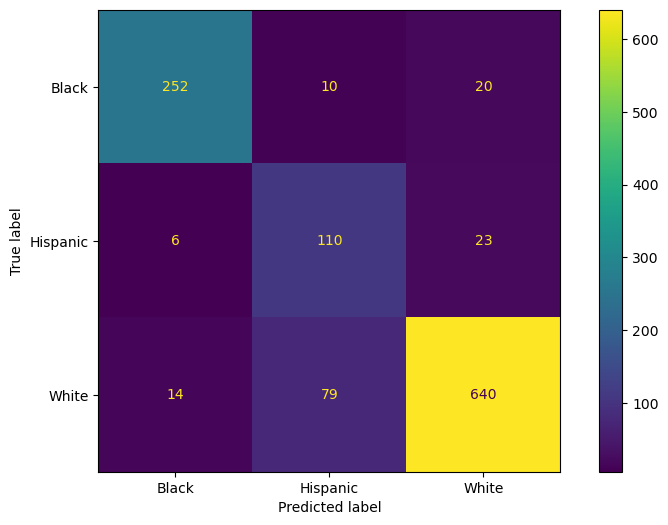

In [291]:
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test);

# Under Sampling

In [292]:
under = RandomUnderSampler(sampling_strategy='auto')

In [293]:
X_train_resampled, y_train_resampled = under.fit_resample(X_train, y_train)

# Check the class distribution
print(y_train_resampled.value_counts())

Black       540
Hispanic    540
White       540
Name: DODRace, dtype: int64


In [294]:
model = LogisticRegression(class_weight='balanced',max_iter=10000,random_state=101)
model.fit(X_train_resampled, y_train_resampled)

LogisticRegression(class_weight='balanced', max_iter=10000, random_state=101)

In [295]:
y_pred = model.predict(X_test)

In [296]:
eval_metric(model, X_train_resampled, y_train_resampled, X_test, y_test)

Test_Set
[[250  20  12]
 [  7 114  18]
 [ 26 116 591]]
              precision    recall  f1-score   support

       Black       0.88      0.89      0.88       282
    Hispanic       0.46      0.82      0.59       139
       White       0.95      0.81      0.87       733

    accuracy                           0.83      1154
   macro avg       0.76      0.84      0.78      1154
weighted avg       0.88      0.83      0.84      1154


Train_Set
[[513  21   6]
 [ 21 462  57]
 [  2  56 482]]
              precision    recall  f1-score   support

       Black       0.96      0.95      0.95       540
    Hispanic       0.86      0.86      0.86       540
       White       0.88      0.89      0.89       540

    accuracy                           0.90      1620
   macro avg       0.90      0.90      0.90      1620
weighted avg       0.90      0.90      0.90      1620



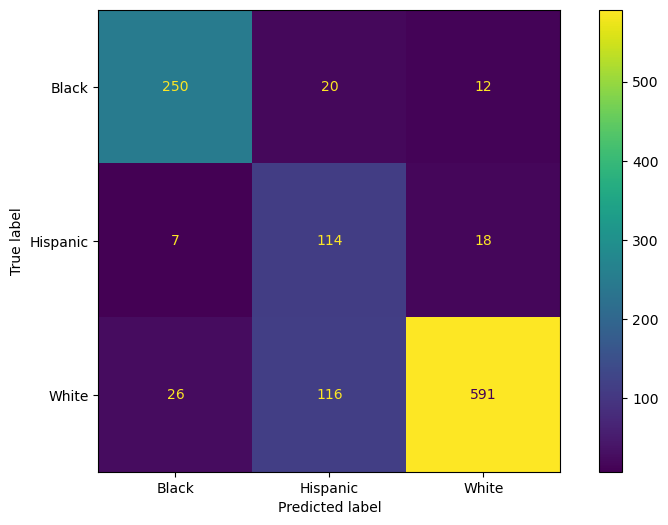

In [297]:
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test);

# Custom Sampling Ratios

In [298]:
over = SMOTE(sampling_strategy={"Hispanic": 1000})
under = RandomUnderSampler(sampling_strategy={"White": 2500})

In [299]:
X_resampled_over, y_resampled_over = over.fit_resample(X_train, y_train)

In [300]:
y_resampled_over.value_counts()

White       3059
Black       1016
Hispanic    1000
Name: DODRace, dtype: int64

In [301]:
X_resampled_under, y_resampled_under = under.fit_resample(X_train, y_train)

In [302]:
y_resampled_under.value_counts()

White       2500
Black       1016
Hispanic     540
Name: DODRace, dtype: int64

In [303]:
model = LogisticRegression(class_weight='balanced',max_iter=10000,random_state=101)
model.fit(X_resampled_over, y_resampled_over)

LogisticRegression(class_weight='balanced', max_iter=10000, random_state=101)

In [304]:
y_pred = model.predict(X_test)

In [305]:
eval_metric(model, X_train_resampled, y_train_resampled, X_test, y_test)

Test_Set
[[256  11  15]
 [  5 111  23]
 [ 16  81 636]]
              precision    recall  f1-score   support

       Black       0.92      0.91      0.92       282
    Hispanic       0.55      0.80      0.65       139
       White       0.94      0.87      0.90       733

    accuracy                           0.87      1154
   macro avg       0.80      0.86      0.82      1154
weighted avg       0.89      0.87      0.88      1154


Train_Set
[[505  23  12]
 [ 28 447  65]
 [  9  62 469]]
              precision    recall  f1-score   support

       Black       0.93      0.94      0.93       540
    Hispanic       0.84      0.83      0.83       540
       White       0.86      0.87      0.86       540

    accuracy                           0.88      1620
   macro avg       0.88      0.88      0.88      1620
weighted avg       0.88      0.88      0.88      1620



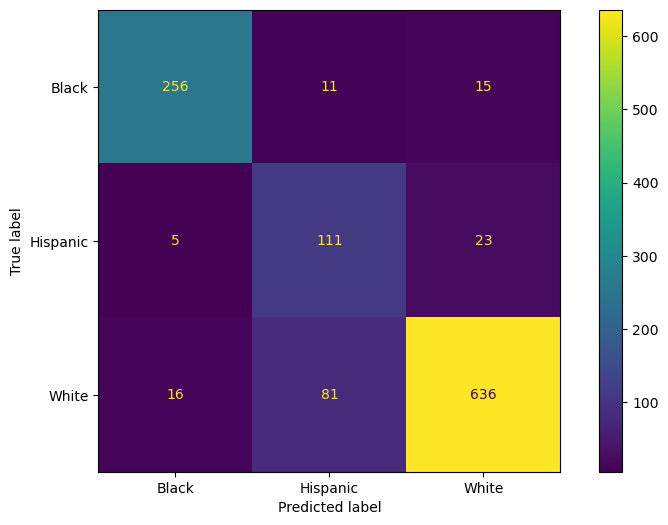

In [306]:
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test);

In [307]:
model = LogisticRegression(class_weight='balanced',max_iter=1000,random_state=101)
model.fit(X_resampled_under, y_resampled_under)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=101)

In [308]:
y_pred = model.predict(X_test)

In [311]:
eval_metric(model, X_train_resampled, y_train_resampled, X_test, y_test)

Test_Set
[[254  15  13]
 [  5 111  23]
 [ 17  83 633]]
              precision    recall  f1-score   support

       Black       0.92      0.90      0.91       282
    Hispanic       0.53      0.80      0.64       139
       White       0.95      0.86      0.90       733

    accuracy                           0.86      1154
   macro avg       0.80      0.85      0.82      1154
weighted avg       0.89      0.86      0.87      1154


Train_Set
[[504  24  12]
 [ 21 453  66]
 [  9  65 466]]
              precision    recall  f1-score   support

       Black       0.94      0.93      0.94       540
    Hispanic       0.84      0.84      0.84       540
       White       0.86      0.86      0.86       540

    accuracy                           0.88      1620
   macro avg       0.88      0.88      0.88      1620
weighted avg       0.88      0.88      0.88      1620



___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___